# The Sparks Foundation Internship - October

# Name- Medarapu Ganesh

# Data Science and Business Analytics

# Task-6 : Prediction Using Decision Tree Algorithm (Intermediate level)

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

# Loading data

In [2]:
iris=pd.read_csv("Iris.csv")

In [3]:
#Reading first 5 rows of data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:

iris.shape

(150, 6)

In [5]:
# Getting info like dtype and non-null values
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Knowing some statistics of data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#Checking for null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Checking how many unique values are present in each column
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
#Getting unique values of species
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Data Visualisation 

In [11]:
plt.style.use('seaborn-dark')

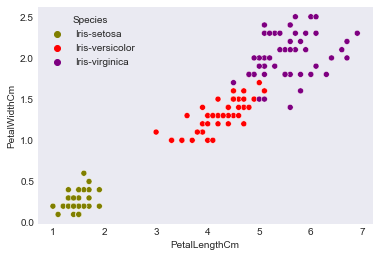

In [12]:
sns.scatterplot(data=iris,x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette='brg_r')
plt.show()

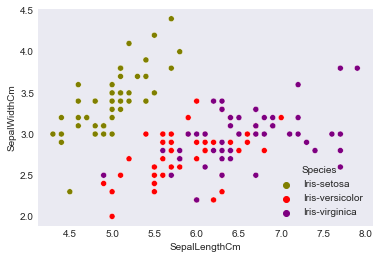

In [13]:
sns.scatterplot(data=iris,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette='brg_r')
plt.show()

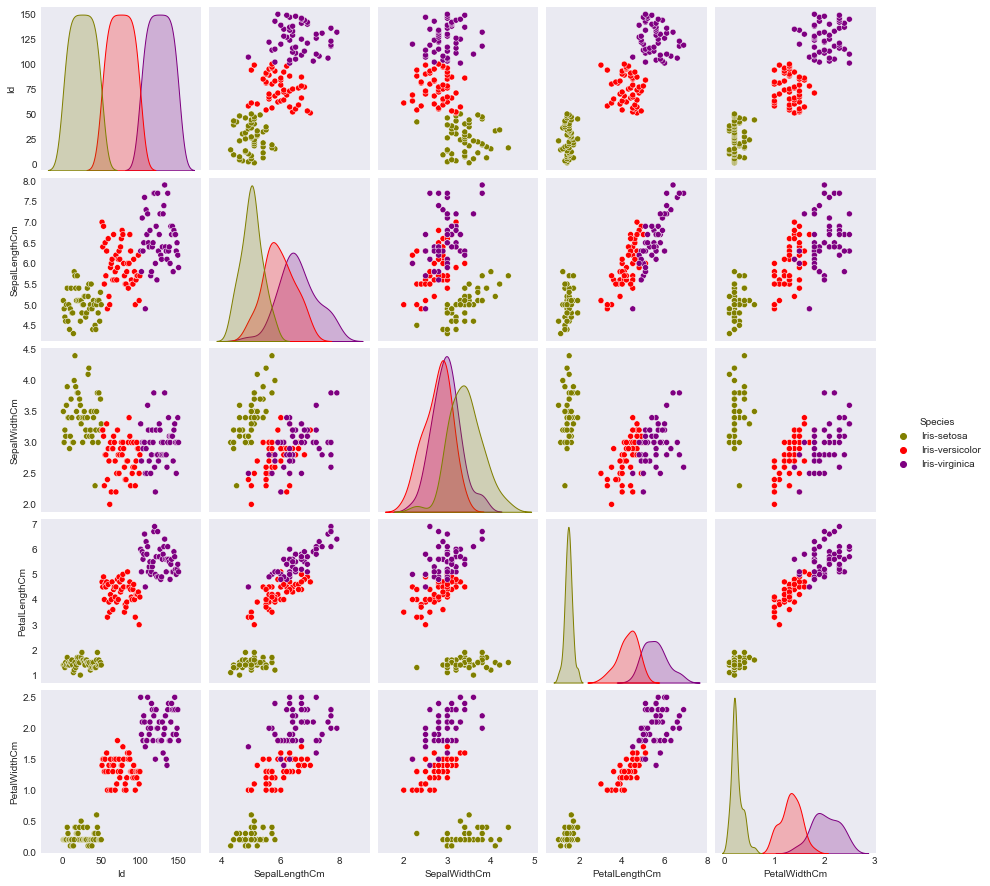

In [14]:
sns.pairplot(iris,hue="Species",palette='brg_r')

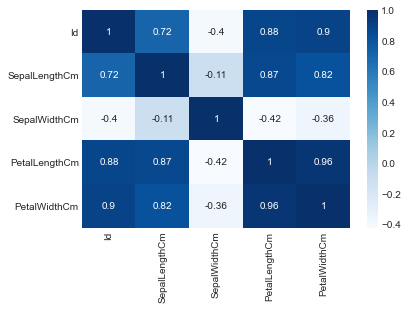

In [15]:
sns.heatmap(iris.corr(),annot=True,cmap='Blues')
plt.show()

In [16]:
#Converting species column to numeric data type by using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
iris['Species']=encoder.fit_transform(iris['Species'])

In [18]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Splitting data

In [19]:
#Splitting data into x and y
x=iris.iloc[:,1:-1]
y=iris.iloc[:,-1]

In [20]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
#Creating decision tree model
from sklearn.tree import DecisionTreeClassifier , plot_tree
classifier=DecisionTreeClassifier()

# Training the model

In [24]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [26]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix of Logistic Regression: \n',cm)
print('Accuracy score of Logistic Regression',accuracy_score(y_test,y_pred)*100,"%")

Confusion matrix of Logistic Regression: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Accuracy score of Logistic Regression 95.55555555555556 %


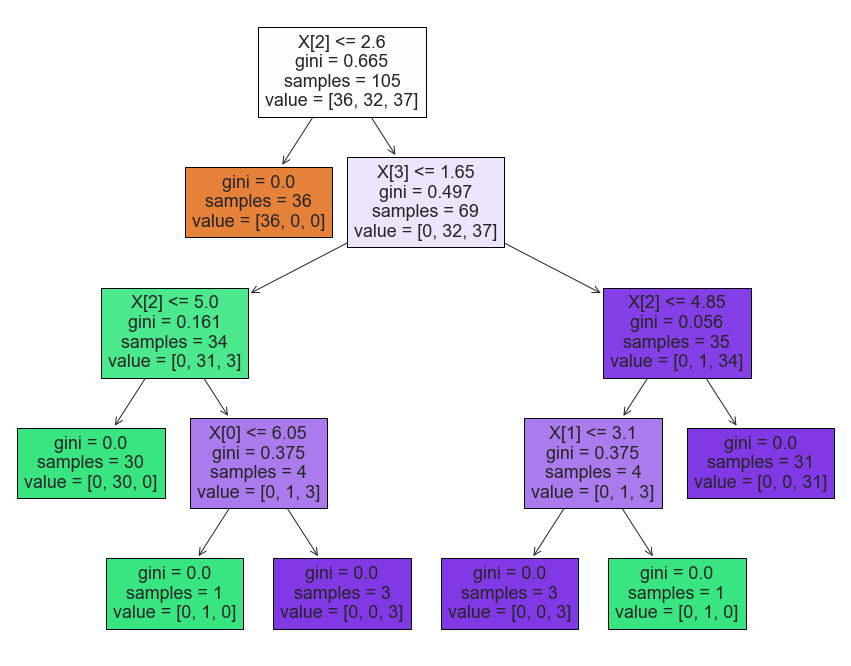

In [27]:
plt.figure(figsize = (15,12))
plot_tree(classifier, filled=True)
plt.show()

# Prediction

In [28]:
result=classifier.predict([[7.9,3.8,6.4,2.0]])
if result==0:
    print("It belongs to Iris-setosa")
elif result==1:
     print("It belongs to Iris-versicolor")
else:
    print("It belongs to Iris-virginica")


It belongs to Iris-virginica
